# Using Water Quality Portal summary services

This is a notebook that is about making use of the summary services provided by the Water Quality Portal

As a first step, you will need to construct a URL that you can use to download data.  The easiest way to do this is to use the Water Qualtiy Portal Query page at https://www.waterqualitydata.us/portal


The summary services are currently not integrated with the page, so you will have to do a little bit of additional work.  You can use the query parameters that are associated with Location

* Country
* State
* County
* Bounding Box
* Radius

![Location](img/Location.png)

In addition, you can use all of the Site-level queries, except filtering by a minimum number of sampling activities.  These are parameters are:

<img align="right" width="500" src="img/Site_parameters.png" alt="The site part of the form" >

* Site type
* Site (Monitoring Location) Identifier
* Organization Identifer
* Hydrologic Unit Code (Watershed)
* Upstream-Downstream queries using the [NLDI](https://waterdata.usgs.gov/blog/nldi-intro/)



We are going to choose stream Locations in Dane County, Wisconsin.

<figure>
  ![Bookmarkable Link](img/Bookmarkable_link.png)
    <figcaption>As you fill out the form, <a href="https://www.waterqualitydata.us/portal/#statecode=US%3A55&countycode=US%3A55%3A025&siteType=Stream&mimeType=csv">a bookmarkable, shareable link</a> is created to download data</figcaption>
</figure>


Next we need to import a few core modules, most notably pandas, matplotlib and seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Build the query String

The next step is to build the query string.  There isn't a super easy way (yet) to build summary services queries, so I'll walk you though one approach. 

The first thing we want to do is copy the GET query string
<figure>
  ![Web Service call area](img/web_service_call.png)
    <figcaption>Click the "Show web services button" on the portal form and copy the part of the GET url between the "?" and "&mimeType"</figcaption>
</figure>

Next we paste that into a variable called "query_fragment"

In [4]:
query_fragment = "statecode=US%3A55&countycode=US%3A55%3A025&siteType=Stream"

Then we add a few other parameters that are important for the summary service

In [5]:
base_url = "https://www.waterqualitydata.us/data/summary/monitoringlocation/search/"

#set the number of  calendar years you are interested in to 1, 5, or all (to get the whole period of record)
summary_years = 5

data_profile = 'periodOfRecord'

mime_type = 'csv'

zip_yes_no = 'no' #This should be yes if the data are at all large



And then here is the final query sting that we are going to use to get Summary Data from the Water Quality Portal

In [6]:
query_string = "{}?{}&dataProfile={}&summaryYears={}&mimeType={}&zip={}".format(base_url, query_fragment, data_profile, summary_years, mime_type, zip_yes_no)

print(query_string)

https://www.waterqualitydata.us/data/summary/monitoringlocation/search/?statecode=US%3A55&countycode=US%3A55%3A025&siteType=Stream&dataProfile=periodOfRecord&summaryYears=5&mimeType=csv&zip=no


## Get the data and start doing things with it!

We are going to pull the data into Pandas, the core data science toolkit for Python

The Pandas `read_csv` function can pull a CSV directly from an API endpoint

In [7]:
dane_county = pd.read_csv(query_string)

Next we are going to do some initial exploration of the data, by just taking a look at it.  

The data are summarized in each row by a combination of `MonitoringLocationID`, `YearSummarized`, and `CharacteristicName`

there are a number of additional fields that are also collected.

In [8]:
dane_county.head()

,Provider,MonitoringLocationIdentifier,YearSummarized,CharacteristicType,CharacteristicName,ActivityCount,ResultCount,LastResultSubmittedDate,OrganizationIdentifier,OrganizationFormalName,MonitoringLocationName,MonitoringLocationTypeName,ResolvedMonitoringLocationTypeName,HUCEightDigitCode,MonitoringLocationUrl,CountyName,StateName,MonitoringLocationLatitude,MonitoringLocationLongitude
0,NWIS,USGS-05406457,2015,Physical,"Stream flow, instantaneous",53,106,NaN,USGS-WI,USGS Wisconsin Water Science Center,BLACK EARTH CREEK NR BREWERY RD AT CROSS PLAIN...,Stream,Stream,7070005,https://www.waterqualitydata.us/provider/NWIS/...,Dane County,Wisconsin,43.109722,-89.640833
1,NWIS,USGS-05406457,2015,Nutrient,Phosphorus,65,65,NaN,USGS-WI,USGS Wisconsin Water Science Center,BLACK EARTH CREEK NR BREWERY RD AT CROSS PLAIN...,Stream,Stream,7070005,https://www.waterqualitydata.us/provider/NWIS/...,Dane County,Wisconsin,43.109722,-89.640833
2,NWIS,USGS-05406457,2015,Physical,Total suspended solids,65,65,NaN,USGS-WI,USGS Wisconsin Water Science Center,BLACK EARTH CREEK NR BREWERY RD AT CROSS PLAIN...,Stream,Stream,7070005,https://www.waterqualitydata.us/provider/NWIS/...,Dane County,Wisconsin,43.109722,-89.640833
3,NWIS,USGS-05406457,2016,Nutrient,Phosphorus,37,37,NaN,USGS-WI,USGS Wisconsin Water Science Center,BLACK EARTH CREEK NR BREWERY RD AT CROSS PLAIN...,Stream,Stream,7070005,https://www.waterqualitydata.us/provider/NWIS/...,Dane County,Wisconsin,43.109722,-89.640833
4,NWIS,USGS-05406457,2016,Physical,Total suspended solids,37,37,NaN,USGS-WI,USGS Wisconsin Water Science Center,BLACK EARTH CREEK NR BREWERY RD AT CROSS PLAIN...,Stream,Stream,7070005,https://www.waterqualitydata.us/provider/NWIS/...,Dane County,Wisconsin,43.109722,-89.640833


Take a quick look at what we have.  There is quite a bit of additional work that could be done (setting date columns, etc), but we can do some fun stuff with this

In [9]:
dane_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2780 entries, 0 to 2779
Data columns (total 19 columns):
Provider                              2780 non-null object
MonitoringLocationIdentifier          2780 non-null object
YearSummarized                        2780 non-null int64
CharacteristicType                    2780 non-null object
CharacteristicName                    2780 non-null object
ActivityCount                         2780 non-null int64
ResultCount                           2780 non-null int64
LastResultSubmittedDate               2023 non-null object
OrganizationIdentifier                2780 non-null object
OrganizationFormalName                2780 non-null object
MonitoringLocationName                2780 non-null object
MonitoringLocationTypeName            2780 non-null object
ResolvedMonitoringLocationTypeName    2780 non-null object
HUCEightDigitCode                     2780 non-null int64
MonitoringLocationUrl                 2780 non-null object
CountyName  

The next step is to start doing some explorations.  Some of the ways that we can explore this categorical dataset are to group data, and then pivot and visualize the data.  Here we can see that Wisconsin DNR is collecting lots of physical data, while USGS in Wisconsin si collecting more nutrient data.

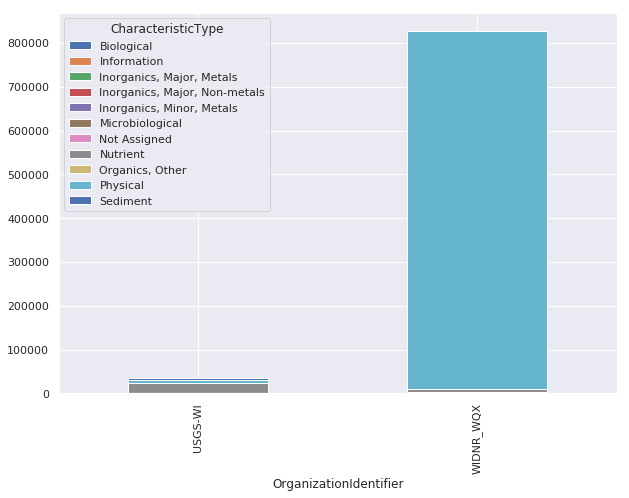

In [10]:
name_type = dane_county.groupby(["OrganizationIdentifier",'CharacteristicType'])['ResultCount'].sum()
name_type = name_type.reset_index()
name_type.head()

name_type_pivot = name_type.pivot(index='OrganizationIdentifier', columns='CharacteristicType', values='ResultCount')
sns.set()
name_type_pivot.plot.bar(stacked=True, figsize=(10,7))

Next we want to roll this data up by year instead of by Characteristic type

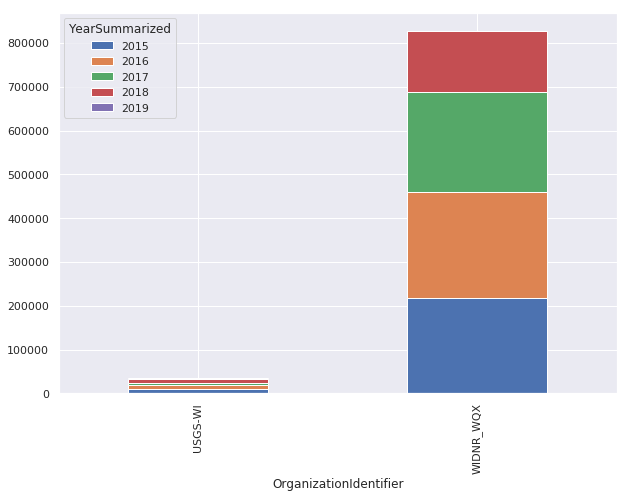

In [11]:
name_year = dane_county.groupby(["OrganizationIdentifier",'YearSummarized'])['ResultCount'].sum()
name_year = name_year.reset_index()
name_year.head()

name_year_pivot = name_year.pivot(index='OrganizationIdentifier', columns='YearSummarized', values='ResultCount')
sns.set()
name_year_pivot.plot.bar(stacked=True, figsize=(10,7))

Lets see what the top characteristics are to see if we can get a little bit more insight into what is driving the sampling density

In [15]:
CharName = dane_county.groupby([
    'CharacteristicName', 'OrganizationIdentifier'])[
    'ResultCount', 'ActivityCount'].sum().reset_index().sort_values(by=['ResultCount'], ascending=False)
CharName.head(20)

,CharacteristicName,OrganizationIdentifier,ResultCount,ActivityCount
61,"Temperature, water",WIDNR_WQX,809857,33393
39,Orthophosphate,USGS-WI,7230,3615
43,Phosphorus,USGS-WI,4486,4266
1,Ammonia and ammonium,USGS-WI,3904,1952
42,Phosphate-phosphorus,WIDNR_WQX,3168,2895
50,"Stream flow, instantaneous",USGS-WI,3098,1549
54,Suspended Sediment Concentration (SSC),USGS-WI,2513,2513
40,Orthophosphate,WIDNR_WQX,2330,2330
25,Inorganic nitrogen (nitrate and nitrite),USGS-WI,1952,1952
36,"Nitrogen, mixed forms (NH3), (NH4), organic, (...",USGS-WI,1951,1951


Ah, it looks like Wisconsin DNR is has temperature sensors out in the field, and may not be rolling the data up in an ideal way.  A next step could be to drop temperature so that we can get a better idea of what else is out there.

In [16]:
import folium